# Bike sharing case study
## Problem Statement
Understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Steps 
To understand the problem and propose a solution and sugestions to the bike sharing company post covid restrictions are removed we will be going through following steps on the given data.
1. Reading, Understandting, cleaning and visualizing the data
2. Preparing the data for modelling
    - Train - Test split
    - Rescaling
3. Training the model
    - RSE method
    - Manual elimenation of features
4. Resudaual analysis
5. Prediction and evaluation on the test set
6. Conclusion and suggestions

## Step 1: Reading, Understandting, cleaning and visualizing the data

### Reading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [2]:
bs = pd.read_csv("day.csv")
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
bs.shape

(730, 16)

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


No null values need to clean up some of the coloumsn
- Drop instant coloumn we will not be needing index
- Convert dteday coloumn to time format
- All the min and max value look consistent with the coloum descriptions.

### Cleaning

In [6]:
bs = bs.drop('instant', axis=1)

In [7]:
bs['dteday']= pd.to_datetime(bs['dteday'])
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [8]:
bs['dteday'].duplicated().any()

False

No duplicate dates good no need to eliminate any rows here

In [9]:
for c in bs.columns:
    print (f"---- {c} ---")
    print(bs[c].value_counts())

---- dteday ---
2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
             ..
2018-03-09    1
2018-04-09    1
2018-05-09    1
2018-06-09    1
2019-12-31    1
Name: dteday, Length: 730, dtype: int64
---- season ---
3    188
2    184
1    180
4    178
Name: season, dtype: int64
---- yr ---
0    365
1    365
Name: yr, dtype: int64
---- mnth ---
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
---- holiday ---
0    709
1     21
Name: holiday, dtype: int64
---- weekday ---
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
---- workingday ---
1    499
0    231
Name: workingday, dtype: int64
---- weathersit ---
1    463
2    246
3     21
Name: weathersit, dtype: int64
---- temp ---
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.84915

For sanity check lets check if `casual` + `registered` = `cnt`

In [10]:
bs.apply(lambda x: (x['casual'] + x['registered'] == x['cnt']), axis=1).value_counts()

True    730
dtype: int64

Looks like the rows coustomer count is valid, Total count is equal to `casual` riders plus `registered`

### Visualizing

Lets start visalizing data, One of the first thing we want to visualize is data spread, how much of outliers are present. This gives us idea on how predictable or model would be.
* Models are better when there are few outliners. 
* We also want to find if there is any liner relation between `cnt` and other variables.

In the data given, `casual` and `registered` will add to `cnt`, When building model we need to figure out if we need all 3 of them.


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"
import seaborn as sns

Lets plot the total usage day by day and also lets plot registerd and casual users also

In [34]:
bs = bs.sort_values(['dteday','mnth'])

In [35]:
bs.plot.line(x='dteday', y='cnt')

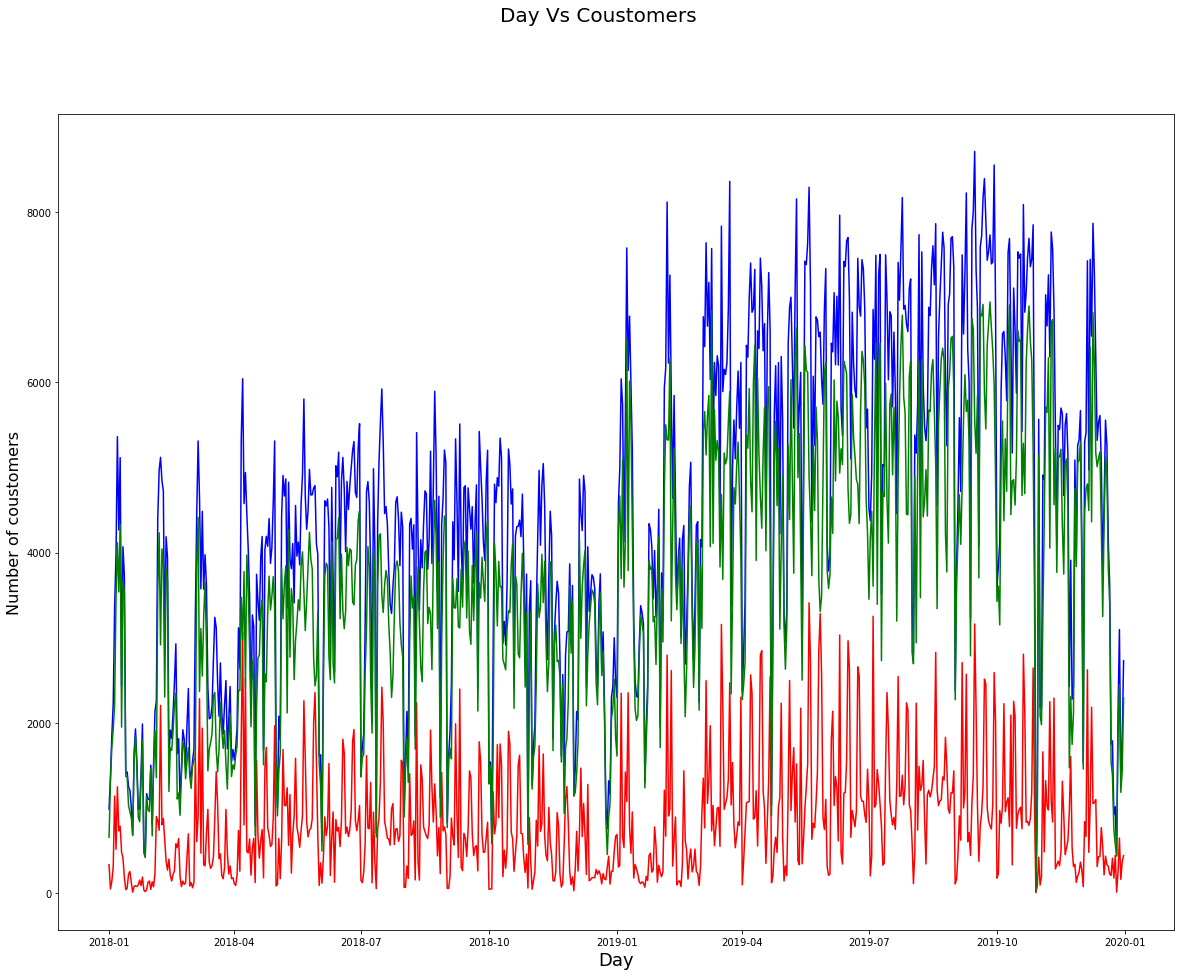

In [38]:
fig = plt.figure(figsize=(20,15))
plt.plot(bs.dteday,bs.cnt, color="blue")
plt.plot(bs.dteday,bs.casual, color="red")
plt.plot(bs.dteday,bs.registered, color="green")
fig.suptitle('Day Vs Coustomers', fontsize=20)              # Plot heading 
plt.xlabel('Day', fontsize=18)                               # X-label
plt.ylabel('Number of coustomers', fontsize=16)
plt.show()

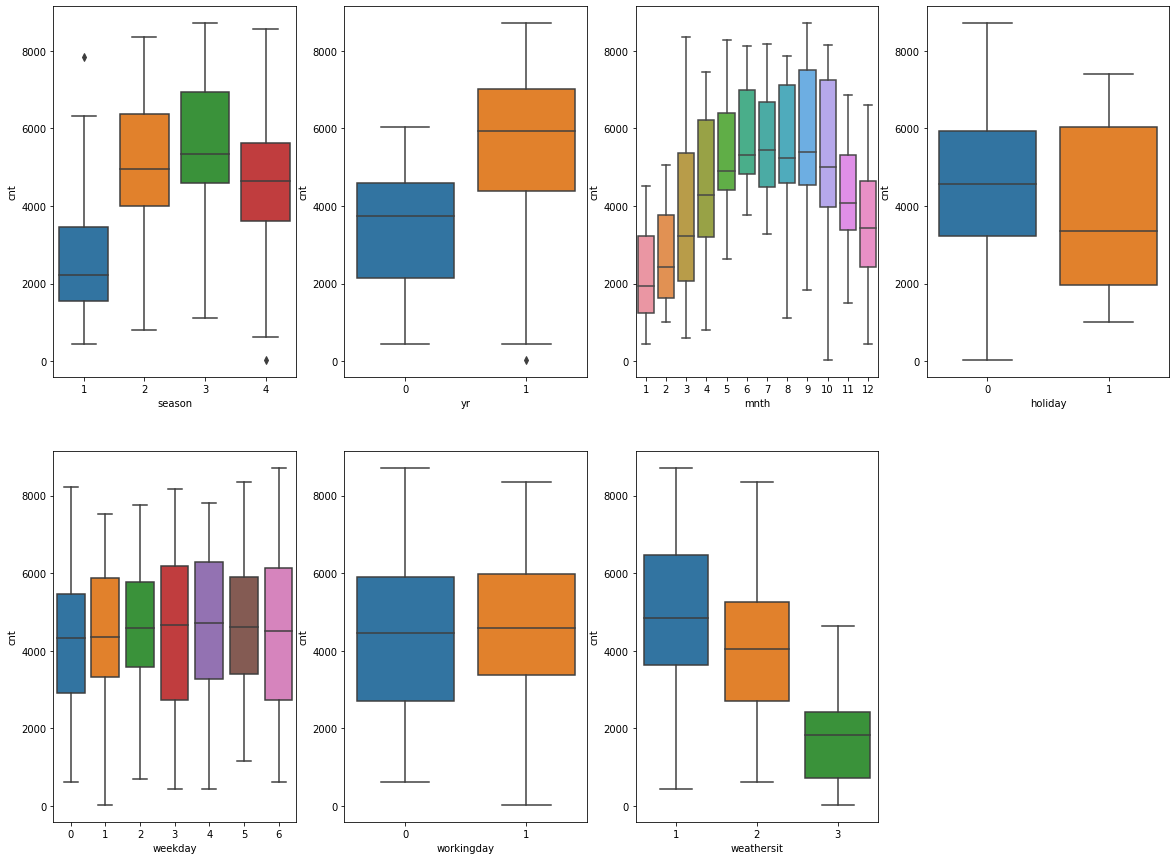

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y='cnt', data=bs)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y='cnt', data=bs)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y='cnt', data=bs)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y='cnt', data=bs)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y='cnt', data=bs)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y='cnt', data=bs)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y='cnt', data=bs)

plt.show()

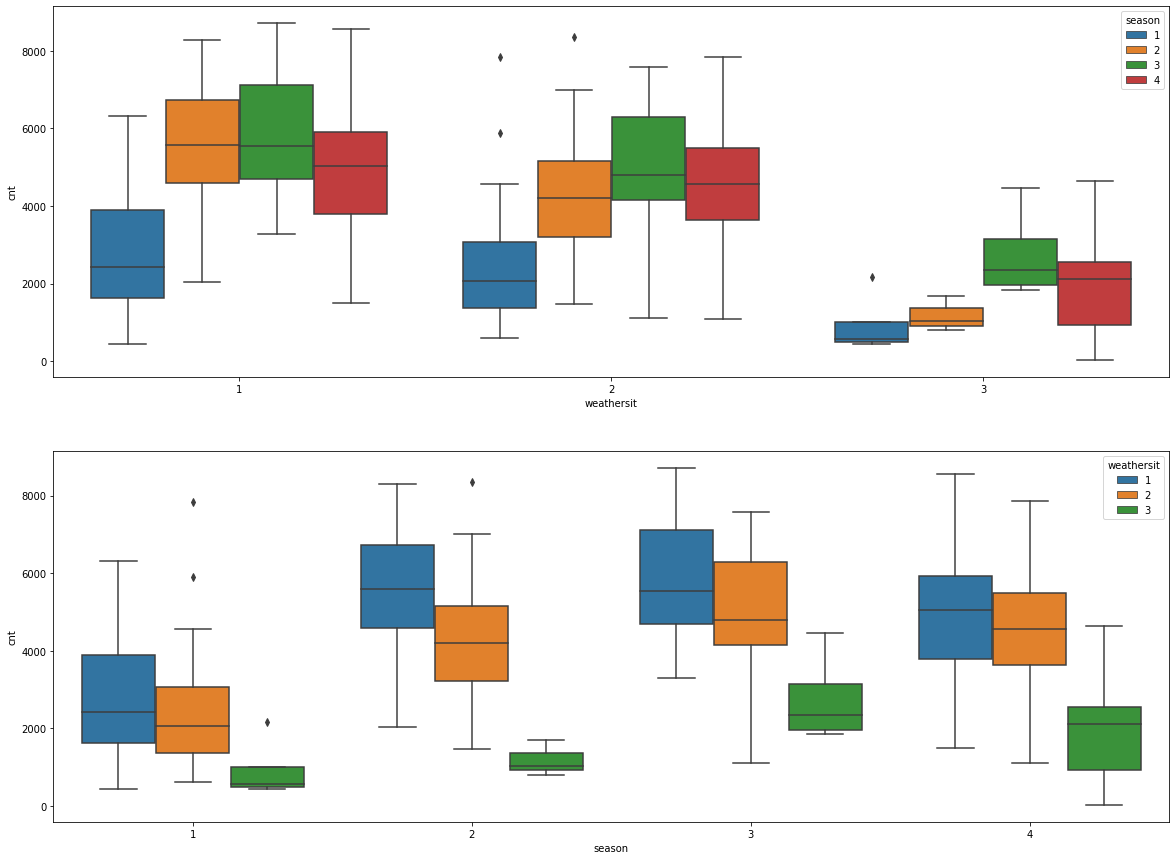

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x = 'weathersit', y='cnt', data=bs, hue='season')

plt.subplot(2,1,2)
sns.boxplot(x = 'season', y='cnt', data=bs, hue='weathersit')
plt.show()

Let's get the corelation map and corelation values to see if linear regression model can be used for this data

## Step 2: Preparing the data for modelling

### Train - Test split

### Rescalling

## Step 3: Training the model

### RSE methos

### Manual elimenation of features

## Step 4: Resdual analysis

## Step 5: Predection and evaluation on the test set

### Predction

### Evaluation

## Step 6: Observations, Conclusions and Suggestions

### Observations

### Conclusions

### Suggestions